<a href="https://colab.research.google.com/github/WubulyJubuly/PHYS3025Work/blob/main/Mid_Term_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Dark Matter Induced Stellar Oscillations"

  MESA was used to “[calibrate] an equilibrium solar model” for the solar surface velocity amplitude. Busy using MESA, the group could then use the solar surface velocity in another program called GYRE. GYRE was used in order to provide accurate data for the metallicity, luminosity, and radius of the sun that was being observed. By using MESA, the group could then see how the values compared to the predictions from the ULDM (ultra-light dark matter).



In [9]:
#Step 1

#The Default Mass is 1 M☉, and the Default Metallicity is 0.02
#the first entry is 2.5106393226855550E+000, which differing than the mass of 1 solar mass default


!pip install git+https://github.com/wmwolf/py_mesa_reader.git

import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr

#to read in the file (you will likely have to alter the name for your own file)

star1= mr.MesaData('/content/star1/trimmed_history.data')

print(star1.bulk_names)

print(star1.star_mass[0])

CM=(((sum(star1.center_h1))/(sum(star1.center_he3) + sum(star1.center_he4)))-1)
print("Metallicy =", CM)

#The bulk names do agree with what the origial file says
#I calculated a central metallicy of 0.7269632745744663, which is diffent than the defualt that was given of 0.02. This could be either a rounding issue or an issue with my or MadStars calculations, as I have had problems with both


  Cloning https://github.com/wmwolf/py_mesa_reader.git to /tmp/pip-req-build-z334bspf
  Running command git clone --filter=blob:none --quiet https://github.com/wmwolf/py_mesa_reader.git /tmp/pip-req-build-z334bspf
  Resolved https://github.com/wmwolf/py_mesa_reader.git to commit 95d93540130db87c30dfba7d81670e79ef6a3826
  Preparing metadata (setup.py) ... done
('model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_

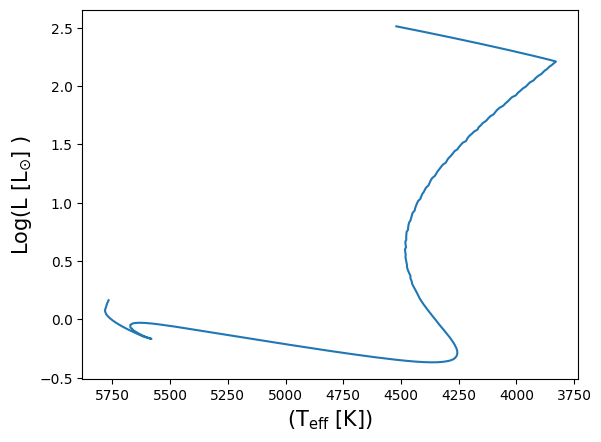

In [ ]:
#Step 1 Graph
plt.plot(star1.Teff, star1.log_L)

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15)

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

plt.savefig('my_figure.eps', bbox_inches='tight', format='eps')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[300 331]
('mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy', 'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas', 'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc', 'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta', 'log_omega', 'v_rot', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'log_D_conv', 'log_D_semi', 'log_D_ovr', 'log_D_thrm')


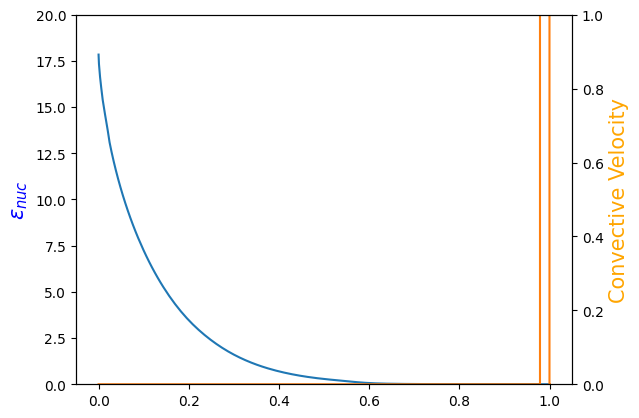

In [11]:
#Step 3
def is_old_and_bright(age, log_lum):
     return age > 3e9 and log_lum > 0
profile1 = mr.MesaLogDir(log_path='/content/star1/', history_file = 'trimmed_history.data')
m_nums = profile1.select_models(is_old_and_bright, 'star_age', 'log_L')
print(m_nums)

profile1_solar=profile1.profile_data(300) #change this number for your model?

#print the list of columns availble in the profile files here
print (profile1_solar.bulk_names)

ax1 = plt.subplot()
plt.plot(profile1_solar.mass, profile1_solar.eps_nuc)
plt.plot(profile1_solar.mass, profile1_solar.conv_vel)
plt.gca().set_ylim([0, 20])
plt.ylabel(r'$\epsilon_{nuc}$', fontsize=15, color='b')
ax2 = ax1.twinx()
plt.ylabel(r'Convective Velocity', fontsize=15, color='orange')

# ---- CHANGE Y AXIS LABEL HERE ---- #
plt.xlabel(r'(M/M$_{\odot}$)', fontsize=15)  # ---- CHANGE X AXIS LABEL HERE ---- #
#plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #
plt.savefig('mesaweb_nuc_convec.png', bbox_inches='tight', format='png')

Text(0, 0.5, 'gradr')

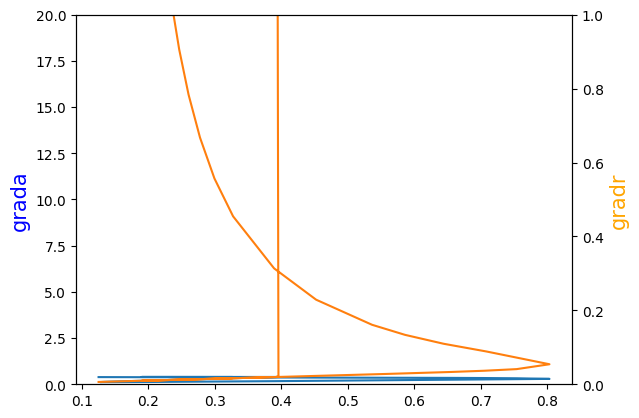

In [14]:
#Step 3 plots of the gradients

ax1 = plt.subplot()
plt.plot(profile1_solar.gradT, profile1_solar.grada)
plt.plot(profile1_solar.gradT, profile1_solar.gradr)
plt.gca().set_ylim([0, 20])
plt.ylabel(r'grada', fontsize=15, color='b')
ax2 = ax1.twinx()
plt.ylabel(r'gradr', fontsize=15, color='orange')


[300 331]
('mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy', 'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas', 'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc', 'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta', 'log_omega', 'v_rot', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'log_D_conv', 'log_D_semi', 'log_D_ovr', 'log_D_thrm')
[320]
('mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy', 'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas', 'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc', 'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta', 'log_o

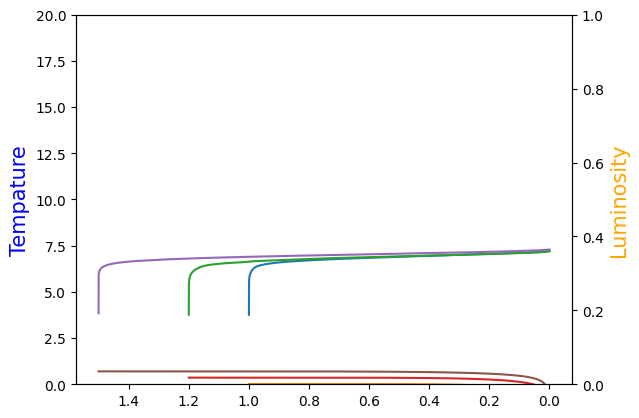

In [53]:
#step 4

def is_old_and_bright(age, log_lum):
     return age > 3e9 and log_lum > 0
profile1 = mr.MesaLogDir(log_path='/content/star1/', history_file = 'trimmed_history.data')
m_nums = profile1.select_models(is_old_and_bright, 'star_age', 'log_L')
print(m_nums)

profile1_solar=profile1.profile_data(300) #change this number for your model?

#print the list of columns availble in the profile files here
print (profile1_solar.bulk_names)

def is_old_and_bright(age, log_lum):
     return age > 3e9 and log_lum > 0
profile2 = mr.MesaLogDir(log_path='/content/star2/', history_file = 'trimmed_history.data')
m_nums = profile2.select_models(is_old_and_bright, 'star_age', 'log_L')
print(m_nums)

profile2_solar=profile2.profile_data(300) #change this number for your model?

#print the list of columns availble in the profile files here
print (profile2_solar.bulk_names)

def is_old_and_bright(age, log_lum):
     return age > 3e9 and log_lum > 0
profile3 = mr.MesaLogDir(log_path='/content/star3/', history_file = 'trimmed_history.data')
m_nums = profile3.select_models(is_old_and_bright, 'star_age', 'log_L')
print(m_nums)

profile3_solar=profile3.profile_data(300) #change this number for your model?

#print the list of columns availble in the profile files here
print (profile3_solar.bulk_names)

ax1 = plt.subplot()

plt.plot(profile1_solar.mass, profile1_solar.logT)
plt.plot(profile1_solar.mass, np.log10(profile1_solar.luminosity))

plt.plot(profile2_solar.mass, profile1_solar.logT)
plt.plot(profile2_solar.mass, np.log10(profile2_solar.luminosity))

plt.plot(profile3_solar.mass, profile3_solar.logT)
plt.plot(profile3_solar.mass,np.log10(profile3_solar.luminosity))

plt.gca().set_ylim([0, 20])
plt.ylabel(r'Tempature', fontsize=15, color='b')
ax2 = ax1.twinx()
plt.ylabel(r'Luminosity', fontsize=15, color='orange')

# ---- CHANGE Y AXIS LABEL HERE ---- #
plt.xlabel(r'Solar Mass', fontsize=15)  # ---- CHANGE X AXIS LABEL HERE ---- #
plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #
plt.savefig('mesaweb_nuc_convec.png', bbox_inches='tight', format='png')

-As we can see, the decrease in mass causes an increase in tempature. However, it also causes the luminosity to decrease.

-The lifetime of a main sequence star decreases as the stellar mass increaeses

-We can see that all the structures terminate at zero, but they all begin at different stages for mass. however, they appear to have an asymtope at a little below 0.4 on the luminosity and 7.7 on the tempature side

('model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius', 'o_core_radius', 'si_core_radius', 'fe_core_radius', 'max_abs_v_velocity', 'surf_avg_omega_div_omega_crit', 'log_total_angular_momentum', 'surf_avg_omega', 'surf_avg_v_rot', 'star_mdot')
0.9999999999999962


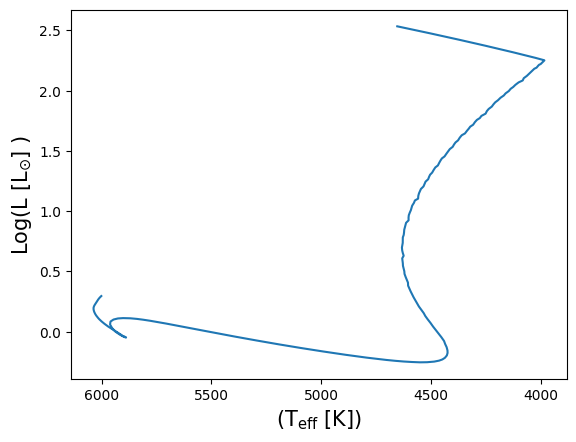

In [73]:
#Step 5

star4= mr.MesaData('/content/star4/trimmed_history.data')

print(star5.bulk_names)

print(star5.star_mass[0])

#CM=(((sum(star4.center_h1))/(sum(star4.center_he3) + sum(star4.center_he4)))-1)
#print("Metallicy =", CM)

plt.plot(star4.Teff, star4.log_L)
plt.plot(star4.Teff, star4.log_L)

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15)

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

plt.savefig('my_figure.eps', bbox_inches='tight', format='eps')

-Increacing the metallicy of the star will cause an increase in opacity

-Due to the increase in opacity, it will be harder for energy to escape, so the reaxion rate will be lower.

('model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius', 'o_core_radius', 'si_core_radius', 'fe_core_radius', 'max_abs_v_velocity', 'surf_avg_omega_div_omega_crit', 'log_total_angular_momentum', 'surf_avg_omega', 'surf_avg_v_rot', 'star_mdot')
1.4999999999999816


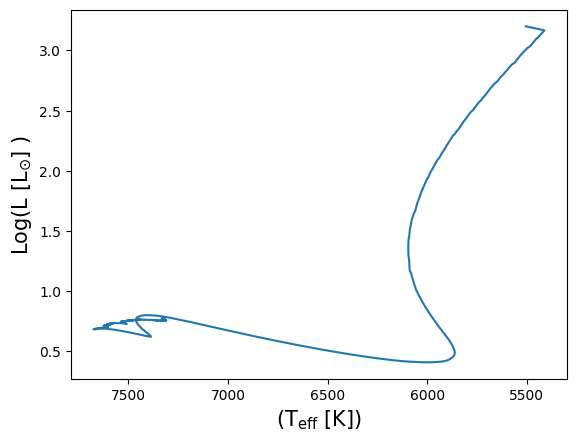

In [7]:
#Step 6

#I chose to use a stelar mass of 1.5, a metallicy of 0.02, and an αMLT of 10.

star5= mr.MesaData('/content/star5/trimmed_history.data')

print(star5.bulk_names)

print(star5.star_mass[0])

plt.plot(star5.Teff, star5.log_L)
#plt.plot(star5.Teff, star5.eps_nuc)

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15)

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

plt.savefig('my_figure.eps', bbox_inches='tight', format='eps')

-I chose to use a stelar mass of 1.5, a metallicy of 0.02, and an αMLT of 10

-Changing the mixing convection had a very large effect on the graph. It shifted the Teff about 2000 K.

-I'm confused as to what that squggle near the left most side represents as it is much more complex and sparadic than the orginal model